### Data Exploration 

This notebook evaluates the data logged by the STCV application.  The investigation is a look at the data produced and used internally by the application. This notebook reviews the data looking for opportunities to apply machine learning. The notebook surveys the data and looks for points of correspondence the could then be feed to a machine learning algorithm. 

First we import the minimum number of libraries need to get started:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [3]:
data_path = "renderExamples/A_dorian_bpm100_06_quaternions.csv"

### Basic Data Evaluation
The data contains UUID which acts a surrogate primary key.  The first column in the data contains that value.  Since UUID is guaranteed to be unique, the column is brought in as an index column. Here the data is read in using Pandas to create a Pandas dataframe. 

In [4]:
df = pd.read_csv(data_path, index_col=0)

Using the Pandas `head()` function, we can get a quick understanding of the data columns. Note the first column UUID will be ignored for the rest of this document

In [5]:
df.head()

,ticks,raw_i,raw_j,raw_k,norm_w,norm_i,norm_j,norm_k,roll,pitch,yaw
02f86505-8b6b-419c-9a66-55a10b517a91,-18965,0,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00
e411d64f-c7d7-4d10-a666-805c3171ba0d,-18946,0,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00
d33ab68c-badd-4600-82a0-557b9895cec6,-18928,2508,-71,-9671,0.25,0.24,-0.01,-0.94,8.67,26.88,-148.05
48f0d3b8-0cae-48a4-9369-191431fc6a0f,-18909,2496,-94,-9672,0.18,0.25,-0.01,-0.95,6.87,27.71,-156.95
b0711f60-8a59-47b4-b829-0a360e0ccae7,-18886,2520,-105,-9668,0.14,0.25,-0.01,-0.96,5.95,28.37,-161.53


Running the Pandas dataframe `info()` method we can inspect the datatypes in the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 02f86505-8b6b-419c-9a66-55a10b517a91 to e63662e3-d266-4a03-9fc6-0767511558d3
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticks   634 non-null    int64  
 1   raw_i   634 non-null    int64  
 2   raw_j   634 non-null    int64  
 3   raw_k   634 non-null    int64  
 4   norm_w  634 non-null    float64
 5   norm_i  634 non-null    float64
 6   norm_j  634 non-null    float64
 7   norm_k  634 non-null    float64
 8   roll    634 non-null    float64
 9   pitch   634 non-null    float64
 10  yaw     634 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 59.4+ KB


Calling describe, basic statistics for the data are presented below

In [7]:
df.describe()

,ticks,raw_i,raw_j,raw_k,norm_w,norm_i,norm_j,norm_k,roll,pitch,yaw
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,-12782.698738,194.728707,-667.178233,118.613565,0.022271,0.032240,-0.085221,0.026924,-10.377019,-5.057618,-34.327035
std,3571.713835,3866.582819,4803.819534,6218.414827,0.058059,0.451196,0.528477,0.711063,105.640444,29.844298,143.869264
min,-18965.000000,-9842.000000,-9490.000000,-9992.000000,0.010000,-1.000000,-1.000000,-1.000000,-179.970000,-81.900000,-179.980000
25%,-15863.000000,-2415.250000,-4403.750000,-6033.500000,0.010000,-0.270000,-0.557500,-0.730000,-91.482500,-25.365000,-167.252500
50%,-12790.500000,110.500000,-869.500000,1086.000000,0.010000,0.010000,-0.110000,0.135000,-23.015000,-3.870000,-119.440000
75%,-9694.000000,2848.500000,2278.000000,5653.250000,0.020000,0.360000,0.290000,0.720000,64.097500,12.742500,125.790000
max,-6632.000000,9931.000000,9747.000000,9975.000000,1.000000,0.990000,0.990000,1.000000,179.670000,80.380000,179.830000


### Checking for Nulls
The following checks to see if we have any nulls in our data.  This situation would need to be remedied if any null data was found be substituting a default value, such as zero. 

In [8]:
print(df.isnull().sum())

ticks     0
raw_i     0
raw_j     0
raw_k     0
norm_w    0
norm_i    0
norm_j    0
norm_k    0
roll      0
pitch     0
yaw       0
dtype: int64


### Calculate Correlation Tables
Now that the data has been confirmed as valid, we are ready to move on to the next step. The current dataset has 12 features, for our purposes we do not want to use all of these features for model training. Rather, we want to choose those features that most directly influence the result.(Lee, 2019) To simplify this, we first usethe `corr()` function. The `corr()` function computes the pairwise correlation of columns:

In [9]:
corr = df.corr(method='pearson')
print(corr)

           ticks     raw_i     raw_j     raw_k    norm_w    norm_i    norm_j  \
ticks   1.000000  0.048044 -0.105309  0.342206 -0.287372  0.068948 -0.124917   
raw_i   0.048044  1.000000 -0.059825  0.106507  0.005848  0.977149 -0.065989   
raw_j  -0.105309 -0.059825  1.000000 -0.194901  0.031068 -0.060225  0.987209   
raw_k   0.342206  0.106507 -0.194901  1.000000 -0.082083  0.105446 -0.197225   
norm_w -0.287372  0.005848  0.031068 -0.082083  1.000000 -0.001069  0.035198   
norm_i  0.068948  0.977149 -0.060225  0.105446 -0.001069  1.000000 -0.072248   
norm_j -0.124917 -0.065989  0.987209 -0.197225  0.035198 -0.072248  1.000000   
norm_k  0.383816  0.106996 -0.187330  0.983182 -0.079754  0.112263 -0.191967   
roll   -0.056092  0.128347  0.111425 -0.082477  0.018143  0.124749  0.122353   
pitch  -0.059461 -0.077871 -0.004581 -0.052359  0.036743 -0.105220 -0.006654   
yaw     0.133834 -0.140180 -0.080883  0.269493 -0.004424 -0.143893 -0.072104   

          norm_k      roll     pitch   

A _positive correlation_ is a relationship between two variables in which both variables move in tandem. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other variable increases. Similarly, a _negative correlation_ is a relationship between two variables in which one variable increases as the other decreases. A perfect negative correlation is represented by the value –1.00: a 0.00 indicates no correlation and a +1.00 indicates a perfect positive correlation.(Lee, 2019)

Below identified is the highest correlations in ascending order.  Only the last 30 items in the series, items with the highest correlation scores, are listed in ascending order

In [10]:
# Derived from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

import pandas as pd

print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Correlation Matrix
           ticks     raw_i     raw_j     raw_k    norm_w    norm_i    norm_j  \
ticks   1.000000  0.048044 -0.105309  0.342206 -0.287372  0.068948 -0.124917   
raw_i   0.048044  1.000000 -0.059825  0.106507  0.005848  0.977149 -0.065989   
raw_j  -0.105309 -0.059825  1.000000 -0.194901  0.031068 -0.060225  0.987209   
raw_k   0.342206  0.106507 -0.194901  1.000000 -0.082083  0.105446 -0.197225   
norm_w -0.287372  0.005848  0.031068 -0.082083  1.000000 -0.001069  0.035198   
norm_i  0.068948  0.977149 -0.060225  0.105446 -0.001069  1.000000 -0.072248   
norm_j -0.124917 -0.065989  0.987209 -0.197225  0.035198 -0.072248  1.000000   
norm_k  0.383816  0.106996 -0.187330  0.983182 -0.079754  0.112263 -0.191967   
roll   -0.056092  0.128347  0.111425 -0.082477  0.018143  0.124749  0.122353   
pitch  -0.059461 -0.077871 -0.004581 -0.052359  0.036743 -0.105220 -0.006654   
yaw     0.133834 -0.140180 -0.080883  0.269493 -0.004424 -0.143893 -0.072104   

          norm_k    

In [11]:
# Create correlation matrix
corr_mat = df.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()
print(type(sorted_mat))

with open("correlatefeatures.txt", "w") as f:
    f.write(sorted_mat.to_string())


<class 'pandas.core.series.Series'>


The following code pull the features with the highest correlation.  Of course, the features with the highest correlation are correlations with themselves.

In [12]:
series_sorted_mat = pd.Series(sorted_mat)
df2 = series_sorted_mat.to_frame()
df2.tail(n=30)

,,0
norm_i,roll,0.124749
roll,raw_i,0.128347
raw_i,roll,0.128347
yaw,ticks,0.133834
ticks,yaw,0.133834
yaw,raw_k,0.269493
raw_k,yaw,0.269493
yaw,norm_k,0.273350
norm_k,yaw,0.273350
raw_k,ticks,0.342206


We now select the features which have the highest correlation with $raw_j$.

In [13]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'raw_j').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'raw_j').values[:,2])

Index(['raw_j', 'norm_j', 'raw_k'], dtype='object')
[1.         0.98720852 0.19490141]


Text(0.5, 1.0, 'Comparing Raw J and Raw K')

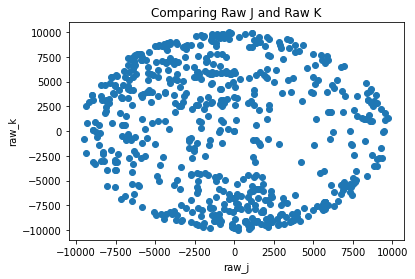

In [14]:
%matplotlib inline

plt.scatter(df['raw_j'], df['raw_k'], marker='o')
plt.xlabel('raw_j')
plt.ylabel('raw_k')
plt.title("Comparing Raw J and Raw K")

Notice that the data where $raw_j$, $norm_j$ almost forms a straight line. 

Text(0.5, 1.0, 'Comparing Raw J with Norm J')

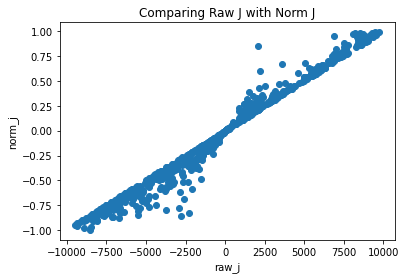

In [15]:
%matplotlib inline

plt.scatter(df['raw_j'], df['norm_j'], marker='o')
plt.xlabel('raw_j')
plt.ylabel('norm_j')
plt.title("Comparing Raw J with Norm J")

In [16]:
df.reset_index(drop=True, inplace=True)

df.head()

,ticks,raw_i,raw_j,raw_k,norm_w,norm_i,norm_j,norm_k,roll,pitch,yaw
0,-18965,0,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-18946,0,0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-18928,2508,-71,-9671,0.25,0.24,-0.01,-0.94,8.67,26.88,-148.05
3,-18909,2496,-94,-9672,0.18,0.25,-0.01,-0.95,6.87,27.71,-156.95
4,-18886,2520,-105,-9668,0.14,0.25,-0.01,-0.96,5.95,28.37,-161.53


From the following plot, we can the three variables $raw_i$, $raw_j$, and $raw_k$ seem to exist independently of each other.

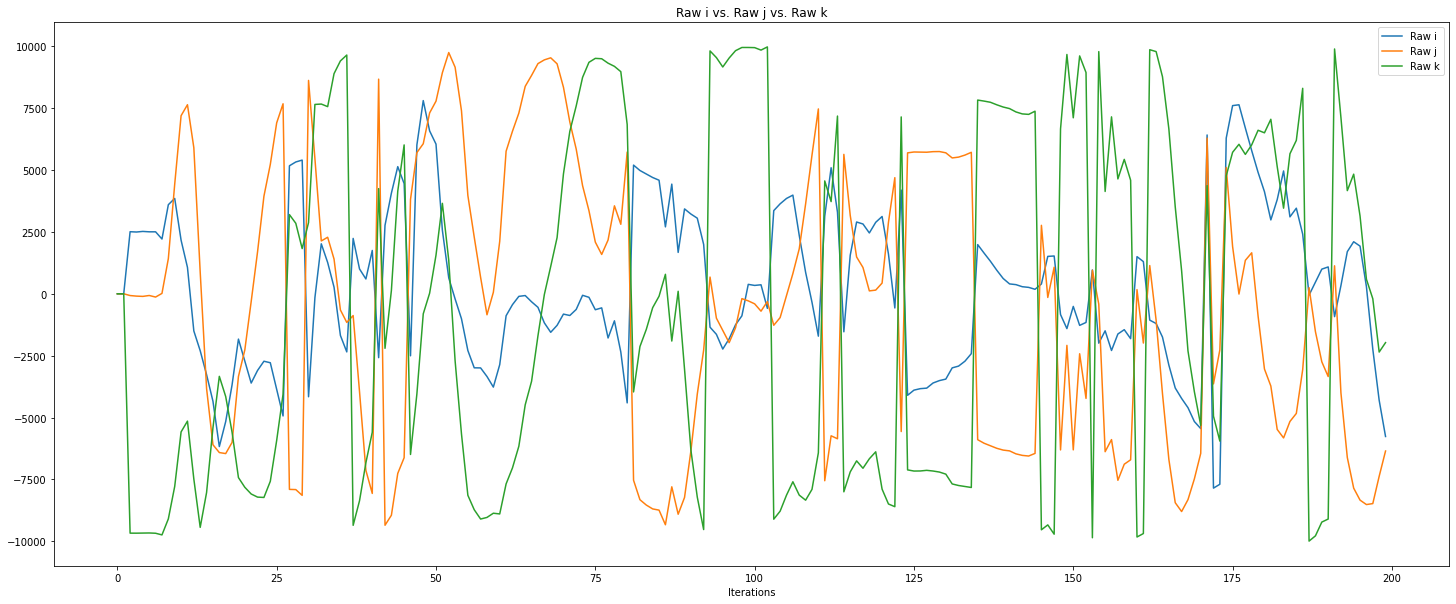

In [17]:


%matplotlib inline
plt.figure(figsize=(25, 10))
plt.plot(df.iloc[:200].index, df.iloc[:200].raw_i,
    label="Raw i"
)
plt.plot(df.iloc[:200].index, df.iloc[:200].raw_j,
    label="Raw j"
)
plt.plot(df.iloc[:200].index, df.iloc[:200].raw_k,
    label="Raw k"
)
plt.title("Raw i vs. Raw j vs. Raw k")
plt.xlabel("Iterations") 
plt.legend()
plt.show()

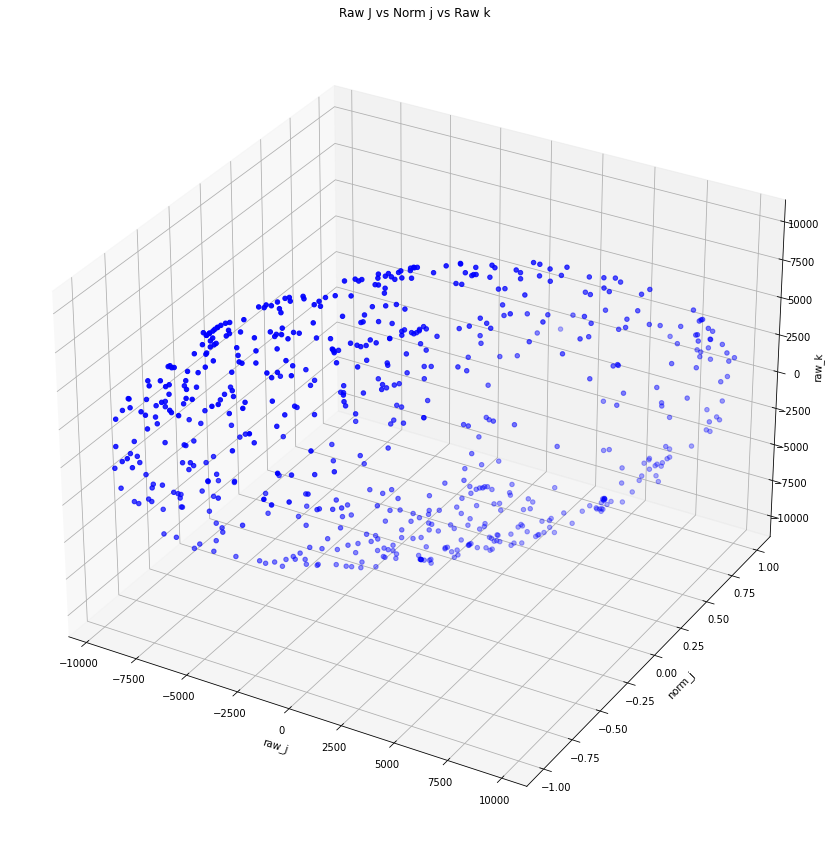

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['raw_j'],
           df['norm_j'],
           df['raw_k'],
           c='b')

ax.set_xlabel("raw_j")
ax.set_ylabel("norm_j")
ax.set_zlabel("raw_k")
plt.title("Raw J vs Norm j vs Raw k")
plt.show()

Holding $raw_k$ at zero we see the outline of the plane formed by $raw_j, raw_k$

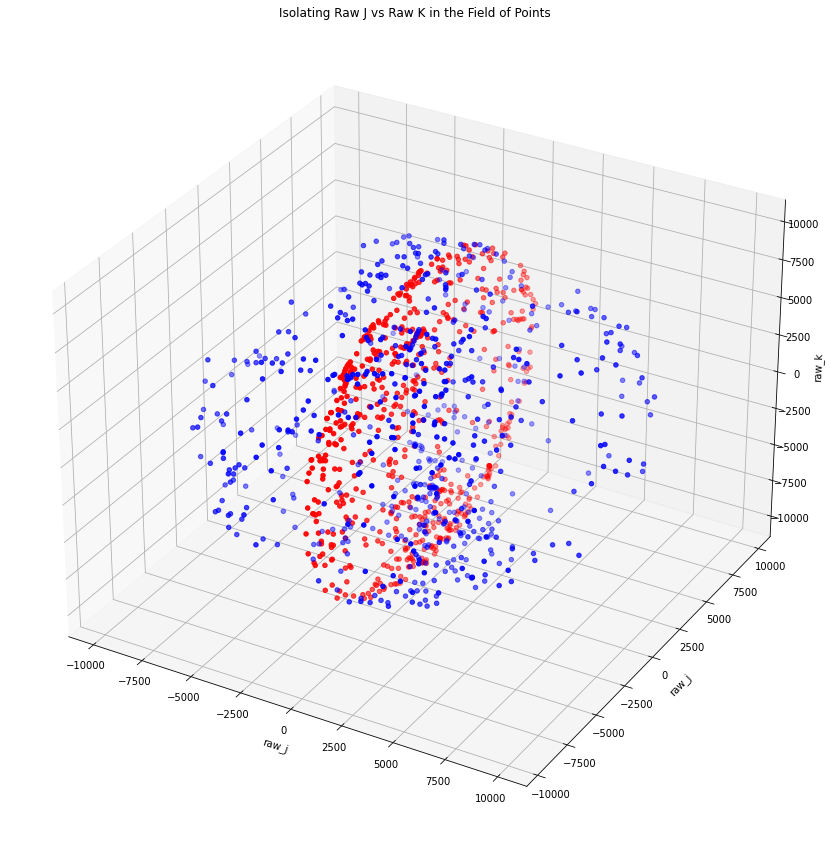

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['raw_i'],
           df['raw_j'],
           df['raw_k'],
           c='b')
           
ax.scatter(0,
           df['raw_j'],
           df['raw_k'],
           c='r')


ax.set_xlabel("raw_j")
ax.set_ylabel("raw_j")
ax.set_zlabel("raw_k")
plt.title("Isolating Raw J vs Raw K in the Field of Points")
plt.show()

Here the following graph we hold $raw_k$ as zero in the green points plot

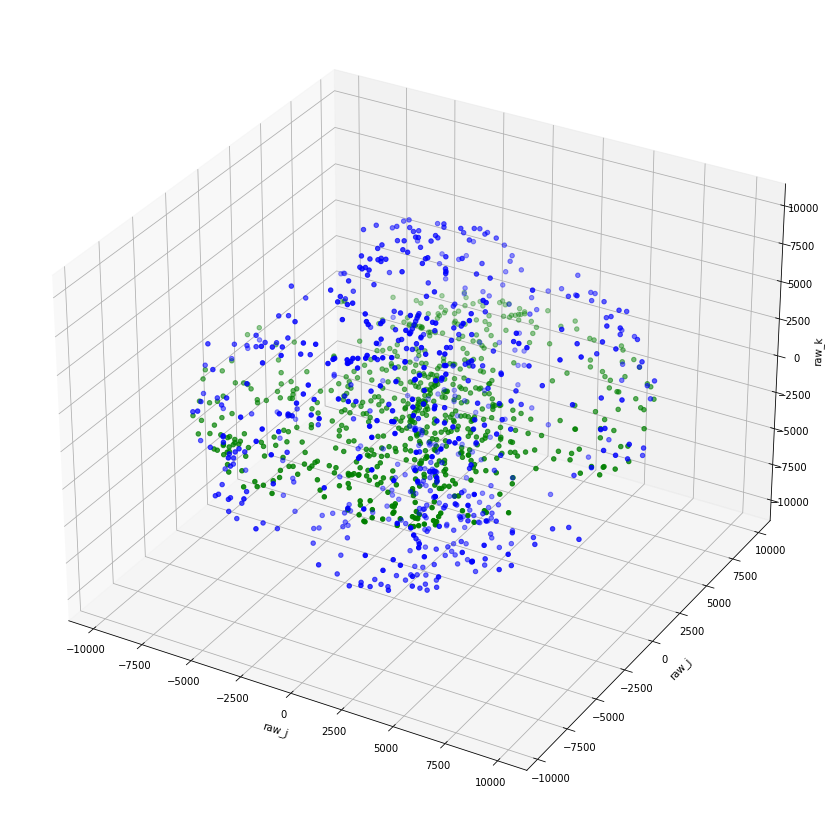

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['raw_i'],
           df['raw_j'],
           df['raw_k'],
           c='b')
           
ax.scatter(df['raw_i'],
           df['raw_j'],
           0,
           c='g')


ax.set_xlabel("raw_j")
ax.set_ylabel("raw_j")
ax.set_zlabel("raw_k")
plt.show()

In [21]:
x = pd.DataFrame(np.c_[df['raw_i'], df['raw_j']], columns = ['raw_i','raw_j'])
Y = df['raw_k']

In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   raw_i   634 non-null    int64
 1   raw_j   634 non-null    int64
dtypes: int64(2)
memory usage: 10.0 KB


Here we distribute the data into testing and training data

In [23]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)

In [24]:
print(x_train1.shape)
print(y_train1.shape)

(443, 2)
(443,)


Then linear regression is applied to see if we can predict the output of $raw_k$

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train1, y_train1)

LinearRegression()

However, the output of $raw_k$ does not seem to suggest that this is the case. Apparently, only about four percent of the data 

In [26]:
raw_k_pred = model.predict(x_test1)
print('R-squared: %.4f' % model.score(x_train1,
                                      y_train1))

R-squared: 0.0414


Further, using mean squared error test, and plotting actual versus predicted we see a large falloff in points.

36127919.445950784


Text(0.5, 1.0, 'Actual Y vs Predicted Y')

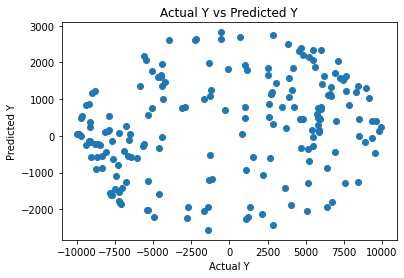

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test1, raw_k_pred)
print(mse)

plt.scatter(y_test1, raw_k_pred)
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual Y vs Predicted Y")

The falloff in points could indicate that $raw_i$, $raw_j$, and $raw_k$ are relatively independent of each other, and therefore are not indicative of each other. Hence, the data was used to calculate a Y output for data analysis. 

In [28]:
from pyquaternion import Quaternion

q_df = df[["norm_w", "norm_i", "norm_j", "norm_k"]]

q0 = Quaternion(1, 0, 0, 0)
distances = list()

for ind in q_df.index:
    w = float(df['norm_w'][ind])
    i = float(df['norm_i'][ind])
    j = float(df['norm_j'][ind])
    k = float(df['norm_k'][ind])
    q1 = Quaternion(w, i, j, k)
    
    distances.append(float(Quaternion.distance(q0, q1)))

q_df = q_df.assign(distance = distances)


In [29]:
x_q = pd.DataFrame(np.c_[q_df['norm_w'], q_df['norm_i'], q_df['norm_j'], q_df['norm_k']], columns = ['norm_w','norm_i', 'norm_j','norm_k',])
distance_y = q_df['distance']

In [30]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_q, distance_y, test_size = 0.3,
                                                    random_state=5)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train2, y_train2)

LinearRegression()

In [32]:
dist_pred = model.predict(x_test2)

In [33]:
print('R-squared: %.4f' % model.score(x_test2,
                                      y_test2))

R-squared: 0.7083


In [34]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3

polynomial_features = PolynomialFeatures(degree = degree)
x_q_poly3 = polynomial_features.fit_transform(x_q)
print(x_q_poly3)

[[ 1.00000e+00  1.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 1.00000e+00  1.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 1.00000e+00  2.50000e-01  2.40000e-01 ... -9.40000e-05 -8.83600e-03
  -8.30584e-01]
 ...
 [ 1.00000e+00  1.00000e-02 -2.00000e-02 ...  2.50000e-03 -5.00000e-02
   1.00000e+00]
 [ 1.00000e+00  1.00000e-02 -3.00000e-02 ...  4.00000e-04 -2.00000e-02
   1.00000e+00]
 [ 1.00000e+00  1.00000e-02 -4.00000e-02 ...  1.00000e-04  1.00000e-02
   1.00000e+00]]


### Third Degree Polynomial
Apparently a third degree polynomial provides the best results with R-squared for the trainiing set equal to 1.000.

In [45]:
model = LinearRegression()
model.fit(x_q_poly3, distance_y)
y_poly_pred3 = model.predict(x_q_poly3)

print('R-squared for training set: %.4f' % model.score(x_q_poly3, distance_y))

R-squared for training set: 1.0000


## Neural Network Investigation


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

2021-12-18 12:52:51.944745: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-18 12:52:51.944763: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [37]:
distance_y = q_df['distance']
# x_q = pd.get_dummies(q_df.drop(['distance'], axis=1))
x_q = pd.DataFrame(np.c_[ q_df['norm_w'], q_df['norm_i'], df['norm_j'], q_df['norm_k']], columns=['norm_w', 'norm_i', 'norm_j', 'norm_k'])


In [38]:
print(x_q.shape)
print(distance_y.shape)

(634, 4)
(634,)


In [39]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_q, distance_y, test_size = 0.3,
                                                    random_state=5)

In [40]:
y_train1.head()

141    1.550796
267    1.550815
71     1.540646
199    1.550700
428    1.560875
Name: distance, dtype: float64

In [41]:

# Create the model
model = keras.Sequential()
model.add(keras.layers.Dense(units=6, activation='linear', input_shape=[4]))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer="adam", metrics = ['accuracy'])

# Display the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 30        
                                                                 
 dense_1 (Dense)             (None, 64)                448       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,703
Trainable params: 4,703
Non-trainable params: 0
_________________________________________________________________


2021-12-18 12:52:53.198292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-18 12:52:53.198594: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-18 12:52:53.198645: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-18 12:52:53.198690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-18 12:52:53.198734: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [42]:
# Training
model.fit( x_train1, y_train1, epochs=200, verbose=1)

Epoch 1/200
14/14 [==============================] - 0s 850us/step - loss: 1.3023 - accuracy: 0.0045
Epoch 2/200
14/14 [==============================] - 0s 893us/step - loss: 0.2789 - accuracy: 0.0000e+00
Epoch 3/200
14/14 [==============================] - 0s 795us/step - loss: 0.0929 - accuracy: 0.0000e+00
Epoch 4/200
14/14 [==============================] - 0s 786us/step - loss: 0.0493 - accuracy: 0.0000e+00
Epoch 5/200
14/14 [==============================] - 0s 732us/step - loss: 0.0339 - accuracy: 0.0000e+00
Epoch 6/200
14/14 [==============================] - 0s 786us/step - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 7/200
14/14 [==============================] - 0s 790us/step - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 8/200
14/14 [==============================] - 0s 837us/step - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 9/200
14/14 [==============================] - 0s 883us/step - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 10/200
14/14 [==============================] - 0s 86

In [43]:
y_predicted = model.predict(x_test1)

score = model.evaluate(x_test1, y_test1, verbose = 1) 

print('Test loss:', score) 



6/6 [==============================] - 0s 777us/step - loss: 1.2281e-04 - accuracy: 0.0000e+00
Test loss: [0.00012280690134502947, 0.0]


## References
Lee, W.-M. (2019). Python Machine Learning. Wiley.